# !!!This notebook is under construction !!!

In [ ]:
%au

In [1]:
#using Pkg
#Pkg.activate(".")
#Pkg.instantiate()
#
#Pkg.add([
    #"Statistics",
    #"Dates",
    #"CSV",
    #"DataFrames",
    #"Query",
    #"Pipe",
    #"StatsPlots",
    #])


 Activating new environment at `~/Code/Julia/weathereffect/Project.toml`
   Updating registry at `~/.julia/registries/General`
######################################################################### 100,0%
No Changes to `~/Code/Julia/weathereffect/Project.toml`
No Changes to `~/Code/Julia/weathereffect/Manifest.toml`
  Resolving package versions...
  Installed Formatting ─────── v0.4.2
  Installed FillArrays ─────── v0.10.1
  Installed SpecialFunctions ─ v1.1.0
  Installed Distributions ──── v0.24.6
  Installed Interpolations ─── v0.13.1
Updating `~/Code/Julia/weathereffect/Project.toml`
  [336ed68f] + CSV v0.8.2
  [a93c6f00] + DataFrames v0.22.1
  [b98c9c47] + Pipe v1.3.0
  [1a8c2f83] + Query v1.0.0
  [f3b207a7] + StatsPlots v0.14.17
  [ade2ca70] + Dates
  [10745b16] + Statistics
Updating `~/Code/Julia/weathereffect/Manifest.toml`
  [621f4979] + AbstractFFTs v0.5.0
  [79e6a3ab] + Adapt v2.3.0
  [7d9fca2a] + Arpack v0.4.0
  [68821587] + Arpack_jll v3.5.0+3
  [56f22d72] + Artifacts v1

In [2]:
using CSV, DataFrames, Statistics, Pipe, StatsPlots, Query, Dates

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278
┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1278
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


In [3]:
suedwest_weather = CSV.File("./data/dwd_hist_weather.csv") |> DataFrame;
first(suedwest_weather, 10)

10×10 DataFrame
 Row │ Station_ID  Date        Rainfall  Snow     Temp_Avg  Temp_Max  Temp_Min ⋯
     │ Int64       Date        Float64   Float64  Float64   Float64   Float64  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │       2483  1955-01-01       3.1     12.0      -5.9      -4.4      -6.7 ⋯
   2 │       2483  1955-01-02       4.0     15.0      -8.4      -6.7      -9.3
   3 │       2483  1955-01-03       0.3     19.0      -8.4      -7.5      -8.7
   4 │       2483  1955-01-04       0.0     19.0      -9.5      -8.6     -10.0
   5 │       2483  1955-01-05       0.0     19.0      -7.8      -4.6     -10.4 ⋯
   6 │       2483  1955-01-06       0.3     16.0      -7.0      -4.2      -8.6
   7 │       2483  1955-01-07       0.0     15.0      -9.0      -8.0      -9.9
   8 │       2483  1955-01-08       0.0     14.0     -10.3      -6.3     -11.5
   9 │       2483  1955-01-09       0.0     12.0      -8.3      -7.0     -10.3 ⋯
  10 │       2483  1955-01-10       9.2     10.0      -5.2      -3.8      -8.1
                                                               3 columns omitted

In [ ]:
names(suedwest_weather)

In [4]:
nrw_avg = CSV.File("./data/dwd_season_avg_nrw1.csv") |> DataFrame
first(nrw_avg, 10)

10×5 DataFrame
 Row │ Year   Winter   Spring   Summer   Autumn  
     │ Int64  Float64  Float64  Float64  Float64 
─────┼───────────────────────────────────────────
   1 │  1881     0.0      7.6     16.66     8.52
   2 │  1882     2.06     9.28    15.48     9.24
   3 │  1883     2.48     6.59    16.37     9.37
   4 │  1884     3.41     8.59    16.45     8.87
   5 │  1885     2.21     7.59    16.11     7.98
   6 │  1886    -0.29     8.02    16.17    10.7
   7 │  1887     0.21     6.46    16.76     7.35
   8 │  1888    -0.74     6.58    15.17     8.19
   9 │  1889    -0.01     8.51    16.79     7.81
  10 │  1890     0.56     8.46    15.08     8.51

In [ ]:
Rev_Winter_mean = round(mean(nrw_avg.Winter[81:110]), digits=2);
Rev_Spring_mean = round(mean(nrw_avg.Spring[81:110]), digits=2);
Rev_Summer_mean = round(mean(nrw_avg.Summer[81:110]), digits=2);
Rev_Autumn_mean = round(mean(nrw_avg.Autumn[81:110]), digits=2);
println("Winter: ", Rev_Winter_mean, "°C")
println("Frühjahr: ", Rev_Spring_mean, "°C")
println("Sommer: ", Rev_Summer_mean)    
println("Herbst: ", Rev_Autumn_mean)

### Blick auf den gesamten Datensatz

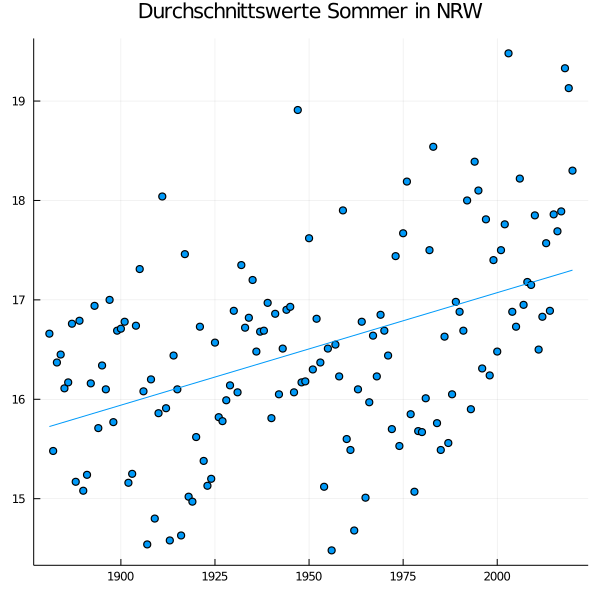

In [5]:
plot(nrw_avg.Year, nrw_avg.Summer,
    reg = :true,
    line = :scatter,
    title = "Durchschnittswerte Sommer in NRW",
    legend = :none,
    size = (600, 600))

In [6]:
println("Standardabweichung 1900 - 1925: ", round(std(nrw_avg.Summer[20:44]), digits=3))
println("Standardabweichung 1926 - 1950: ", round(std(nrw_avg.Summer[45:69]), digits=3))
println("Standardabweichung 1951 - 1975: ", round(std(nrw_avg.Summer[70:94]), digits=3))
println("Standardabweichung 1994 - 2019: ", round(std(nrw_avg.Summer[116:140]), digits=3))

Standardabweichung 1900 - 1925: 0.973
Standardabweichung 1926 - 1950: 0.663
Standardabweichung 1951 - 1975: 0.861
Standardabweichung 1994 - 2019: 0.891


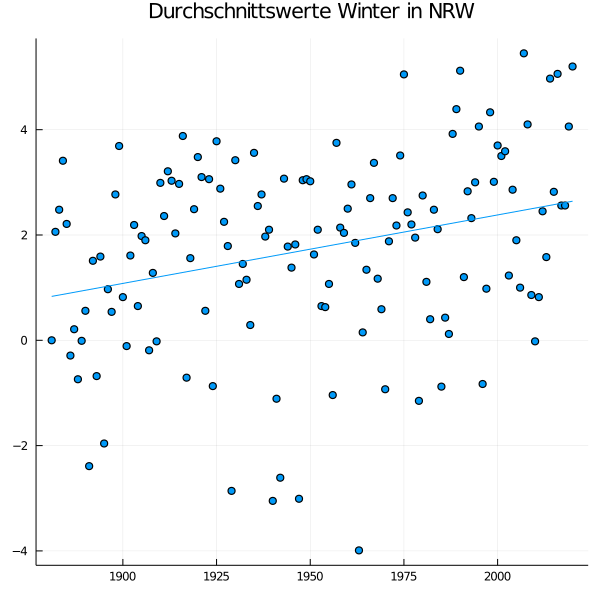

In [7]:
plot(nrw_avg.Year, nrw_avg.Winter,
    reg = :true,
    grid = :true,
    line = :scatter,
    title = "Durchschnittswerte Winter in NRW",
    legend = :none,
    size = (600, 600))

In [8]:
println("Standardabweichung 1900 - 1925: ", round(std(nrw_avg.Winter[20:44]), digits=3))
println("Standardabweichung 1926 - 1950: ",round(std(nrw_avg.Winter[45:69]), digits=3))
println("Standardabweichung 1951 - 1970: ",round(std(nrw_avg.Winter[70:94]), digits=3))
println("Standardabweichung 1994 - 2019: ",round(std(nrw_avg.Winter[115:140]), digits=3))

Standardabweichung 1900 - 1925: 1.387
Standardabweichung 1926 - 1950: 2.15
Standardabweichung 1951 - 1970: 1.704
Standardabweichung 1994 - 2019: 1.698


## Blick auf Südwestfalen

### Grünlandtemperatursumme

Die Grünlandtemperatursumme ist ein errechneter Temperaturwert der in der Agrarmeterologie verwandt wird. Hintergrund ist hierbei, dass ab einem Summenwert von 200°C die Vegatationruhe des Winters endet und das Pflanzenwachstum startet. Die Böden haben sich soweit erwärmt, dass sie Nährstoffe bereitstellen können.

Um die Grünlandtemperatursumme zu errechnen werden all positive Werte addiert. 
* Im Januar wird die Summe mit 0,5 multipliziert
* Im Februar wird die Summe mit 0,75 multipliziert
* Ab März gelten die errechneten Werte

In der Grafik für NRW konnte man sehen, dass die durchschnittlichen Temperaturen über alle Jahreszeit seit 1880 ansteigen. 
Welche Auswirkung hat das auf Südwestfalen?
Anhand der Grünlandtemperatursumme wird das Beispielhaft für die Standorte
* Kahler Asten ==> Hochsauerlandkreis ==> 1955 bis 2019
* Lüdenscheid ==> Märkische Kreis ==> 1950 bis 1995
* Lüdenscheid ==> Märkische Kreis ==> 1994 bis 2019
* Bad Sassendorf ==> Kreis Soest ==> 1950 bis 1980
* Lippstadt ==> Kreis Soest ==> 1981 bis 2019
* Lennestadt ==> Kreis Siegen ==> 1962 bis 2019

aufgezeigt.

**Selektion der Daten**

In [10]:
gtsdata = suedwest_weather |> @query(i, begin
            @where i.Year >= 1950 && i.Month <= 6 && i.Temp_Avg >= 0.0 && i.Station_ID != 1300
            @select {i.Station_ID, i.Date, i.Month, i.Year, i.Temp_Avg}
    end) |> DataFrame

first(gtsdata, 10)

10×5 DataFrame
 Row │ Station_ID  Date        Month  Year   Temp_Avg 
     │ Int64       Date        Int64  Int64  Float64  
─────┼────────────────────────────────────────────────
   1 │       2483  1955-01-16      1   1955       3.2
   2 │       2483  1955-01-22      1   1955       0.7
   3 │       2483  1955-01-24      1   1955       3.4
   4 │       2483  1955-01-25      1   1955       2.4
   5 │       2483  1955-01-27      1   1955       3.2
   6 │       2483  1955-01-28      1   1955       6.3
   7 │       2483  1955-01-29      1   1955       4.6
   8 │       2483  1955-01-30      1   1955       2.1
   9 │       2483  1955-01-31      1   1955       2.8
  10 │       2483  1955-02-01      2   1955       4.8

**Erstellen eines leeren Dataframes um die errechneten Werte abspeichern zu können**

In [12]:
gtsdf = DataFrame(Station_ID = Int64[], Year = Int64[], Day = Int64[], Gts_Temp = Float64[])

0×4 DataFrame

**Errechnung der Temperatursummen für alle Stationen**

In [26]:
stationen = unique(gtsdata.Station_ID);
countStationen = size(stationen);

for s in 1:8
    gtsYearRange = gtsdata |> @query(i, begin
            @where i.Station_ID == stationen[s]
            @select {i.Year}
    end) |> DataFrame

    gtsYearRangeMin = minimum(gtsYearRange.Year)
    gtsYearRangeMax = maximum(gtsYearRange.Year)

    iyearRange = gtsYearRangeMin:gtsYearRangeMax
    
   
    
    for iyear in iyearRange
        gtsJanDf = gtsdata |> @query(i, begin
            @where i.Year == iyear && i.Month == 1 && i.Station_ID == stationen[s]
            @select {i.Date, i.Temp_Avg}
        end) |> DataFrame
    
        gtsJan = sum(gtsJanDf.Temp_Avg) * 0.5
    
        gtsFebDf = gtsdata |> @query(i, begin
            @where i.Year == iyear && i.Month == 2 && i.Station_ID == stationen[s]
            @select {i.Date, i.Temp_Avg}
        end) |> DataFrame       
    
        gtsFeb = sum(gtsFebDf.Temp_Avg) * 0.75
    
        gtsMarDf = gtsdata |> @query(i, begin
            @where i.Year == iyear && i.Month > 2 && i.Station_ID == stationen[s]
            @select {i.Date, i.Temp_Avg}
        end) |> DataFrame
    
        daycounter = 1
        gts = round((gtsJan + gtsFeb), digits=2)
        
        while gts <= 200
           gts = gts + gtsMarDf.Temp_Avg[daycounter]
           daycounter = daycounter + 1
        end
    
        gtsdate = gtsMarDf[daycounter, :]
        gtsday = dayofyear(gtsdate.Date)
        push!(gtsdf, [stationen[s], iyear, gtsday, gts])
    
    end
end


**Die errechneten Temperatursummen**

In [29]:
first(gtsdf, 15)

15×4 DataFrame
 Row │ Station_ID  Year   Day    Gts_Temp 
     │ Int64       Int64  Int64  Float64  
─────┼────────────────────────────────────
   1 │       2483   1955    127    206.55
   2 │       2483   1956    130    200.85
   3 │       2483   1957    105    202.7
   4 │       2483   1958    130    203.35
   5 │       2483   1959    104    209.65
   6 │       2483   1960    111    202.22
   7 │       2483   1961     97    208.45
   8 │       2483   1962    131    203.8
   9 │       2483   1963    126    202.1
  10 │       2483   1964    125    201.85
  11 │       2483   1965    133    205.45
  12 │       2483   1966    117    208.05
  13 │       2483   1967    130    204.55
  14 │       2483   1968    115    211.32
  15 │       2483   1969    129    205.65

In [33]:
println("Der Datensatz umfasst insgesamt ",size(gtsdf)[1], " Zeilen" )

Der Datensatz umfasst insgesamt 311 Zeilen


(311, 4)

**Separieren der Stationen für einen Plot**

In [35]:
lued = gtsdf |> @query(i, begin
            @where i.Station_ID == 3096 || i.Station_ID == 3098
            @select {i.Year, i.Day, i.Gts_Temp}
    end) |> DataFrame;
  

In [36]:
soest = gtsdf |> @query(i, begin
            @where i.Station_ID == 4401 || i.Station_ID == 3031
            @select {i.Year, i.Day, i.Gts_Temp}
    end) |> DataFrame; 

In [37]:
hsk = gtsdf |> @query(i, begin
            @where i.Station_ID == 2483
            @select {i.Year, i.Day, i.Gts_Temp}
    end) |> DataFrame;

In [38]:
siegen = gtsdf |> @query(i, begin
            @where i.Station_ID == 2947
            @select {i.Year, i.Day, i.Gts_Temp}
    end) |> DataFrame;  

In [41]:
mk = scatter(lued.Year, lued.Day, reg = :true, title = "Lüdenscheid Märkischer Kreis");
so = scatter(soest.Year, soest.Day, reg = :true, title = "Bad Sassendorf / Lippstadt Kreis Soest");
hsk = scatter(hsk.Year, hsk.Day, reg = :true, title = "Kahler Asten HSK");
si = scatter(siegen.Year, siegen.Day, reg = :true, title = "Lennestadt Kreis Siegen");

LoadError: type Plot has no field Year

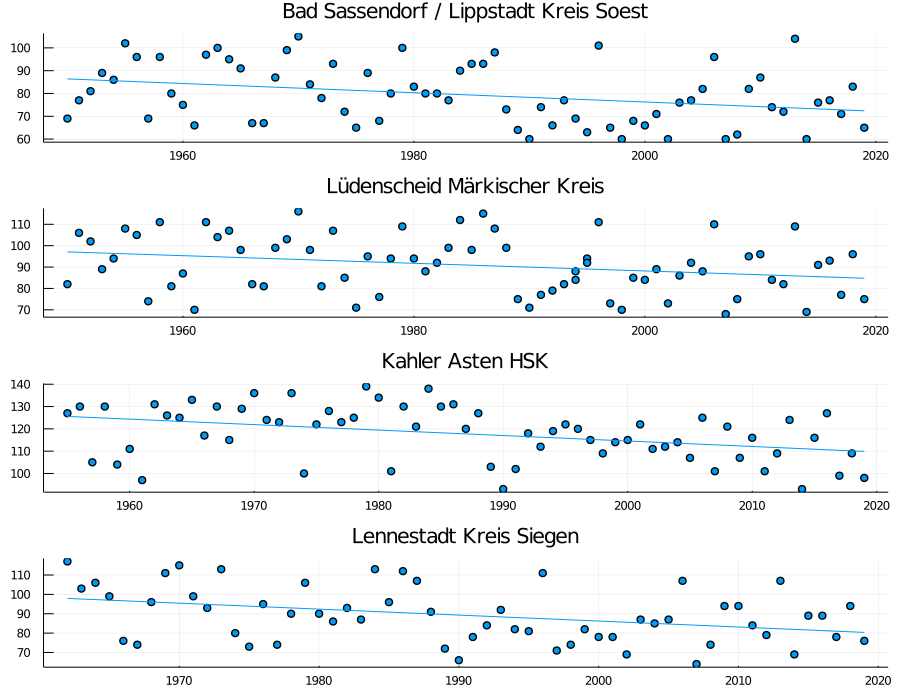

In [42]:
plot(so, mk, hsk, si, layout = (4, 1), legend = false, size = (900, 700))